In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
plt.style.use('ggplot')
import seaborn as sns

In [2]:
df = pd.read_csv('forestfires.csv')

In [3]:
target ='area'

In [4]:
df.shape

(517, 13)

In [5]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


## Checking Missing values

In [7]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

## EDA

In [8]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


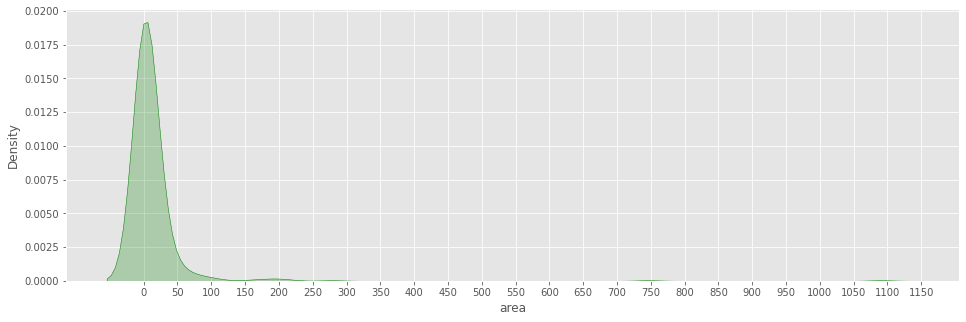

In [9]:
plt.figure(figsize=(16, 5))
print("Skew: {}".format(df[target].skew()))
print("Kurtosis: {}".format(df[target].kurtosis()))
ax = sns.kdeplot(df[target], shade=True, color = 'g')
plt.xticks([i for i in range(0, 1200, 50)])
plt.show()

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


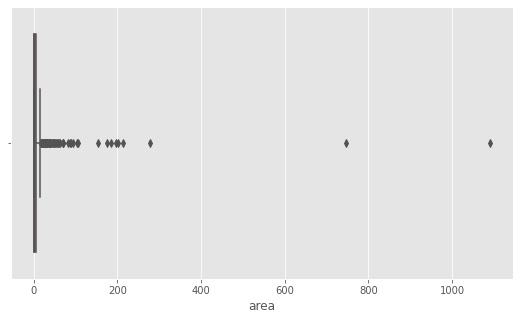

In [10]:
ax = sns.boxplot(df[target])

In [11]:
#outlier points
y_outliers = df[abs(zscore(df[target])) >= 3]
y_outliers

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53


In [12]:
dfa = df.drop(columns = target)
cat_columns = dfa.select_dtypes(include = 'object').columns.tolist()
num_columns = dfa.select_dtypes(exclude = 'object').columns.tolist()

cat_columns, num_columns


(['month', 'day'],
 ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'])

## categorical columns

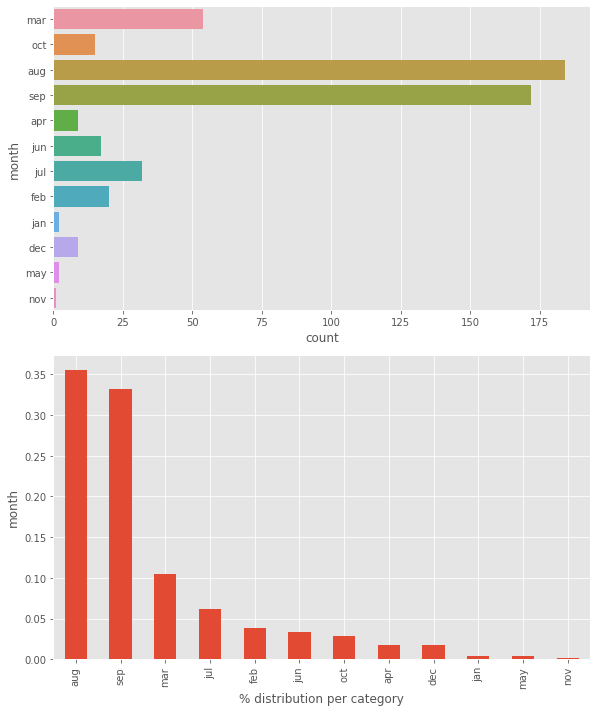

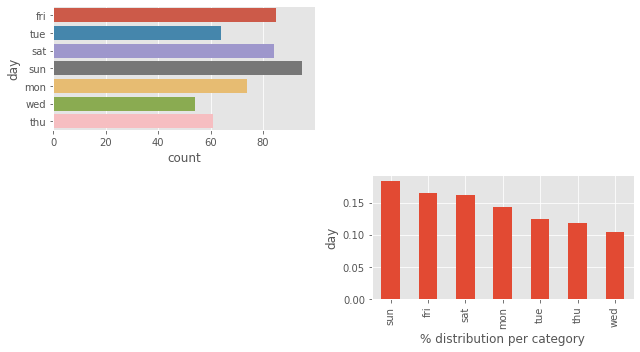

In [13]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(cat_columns, 1):
    plt.subplot(2,2,1)
    sns.countplot(data = dfa, y = col)
    plt.subplot(2,2, i+2)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')

    plt.tight_layout()
    plt.show()

## Numerical columns

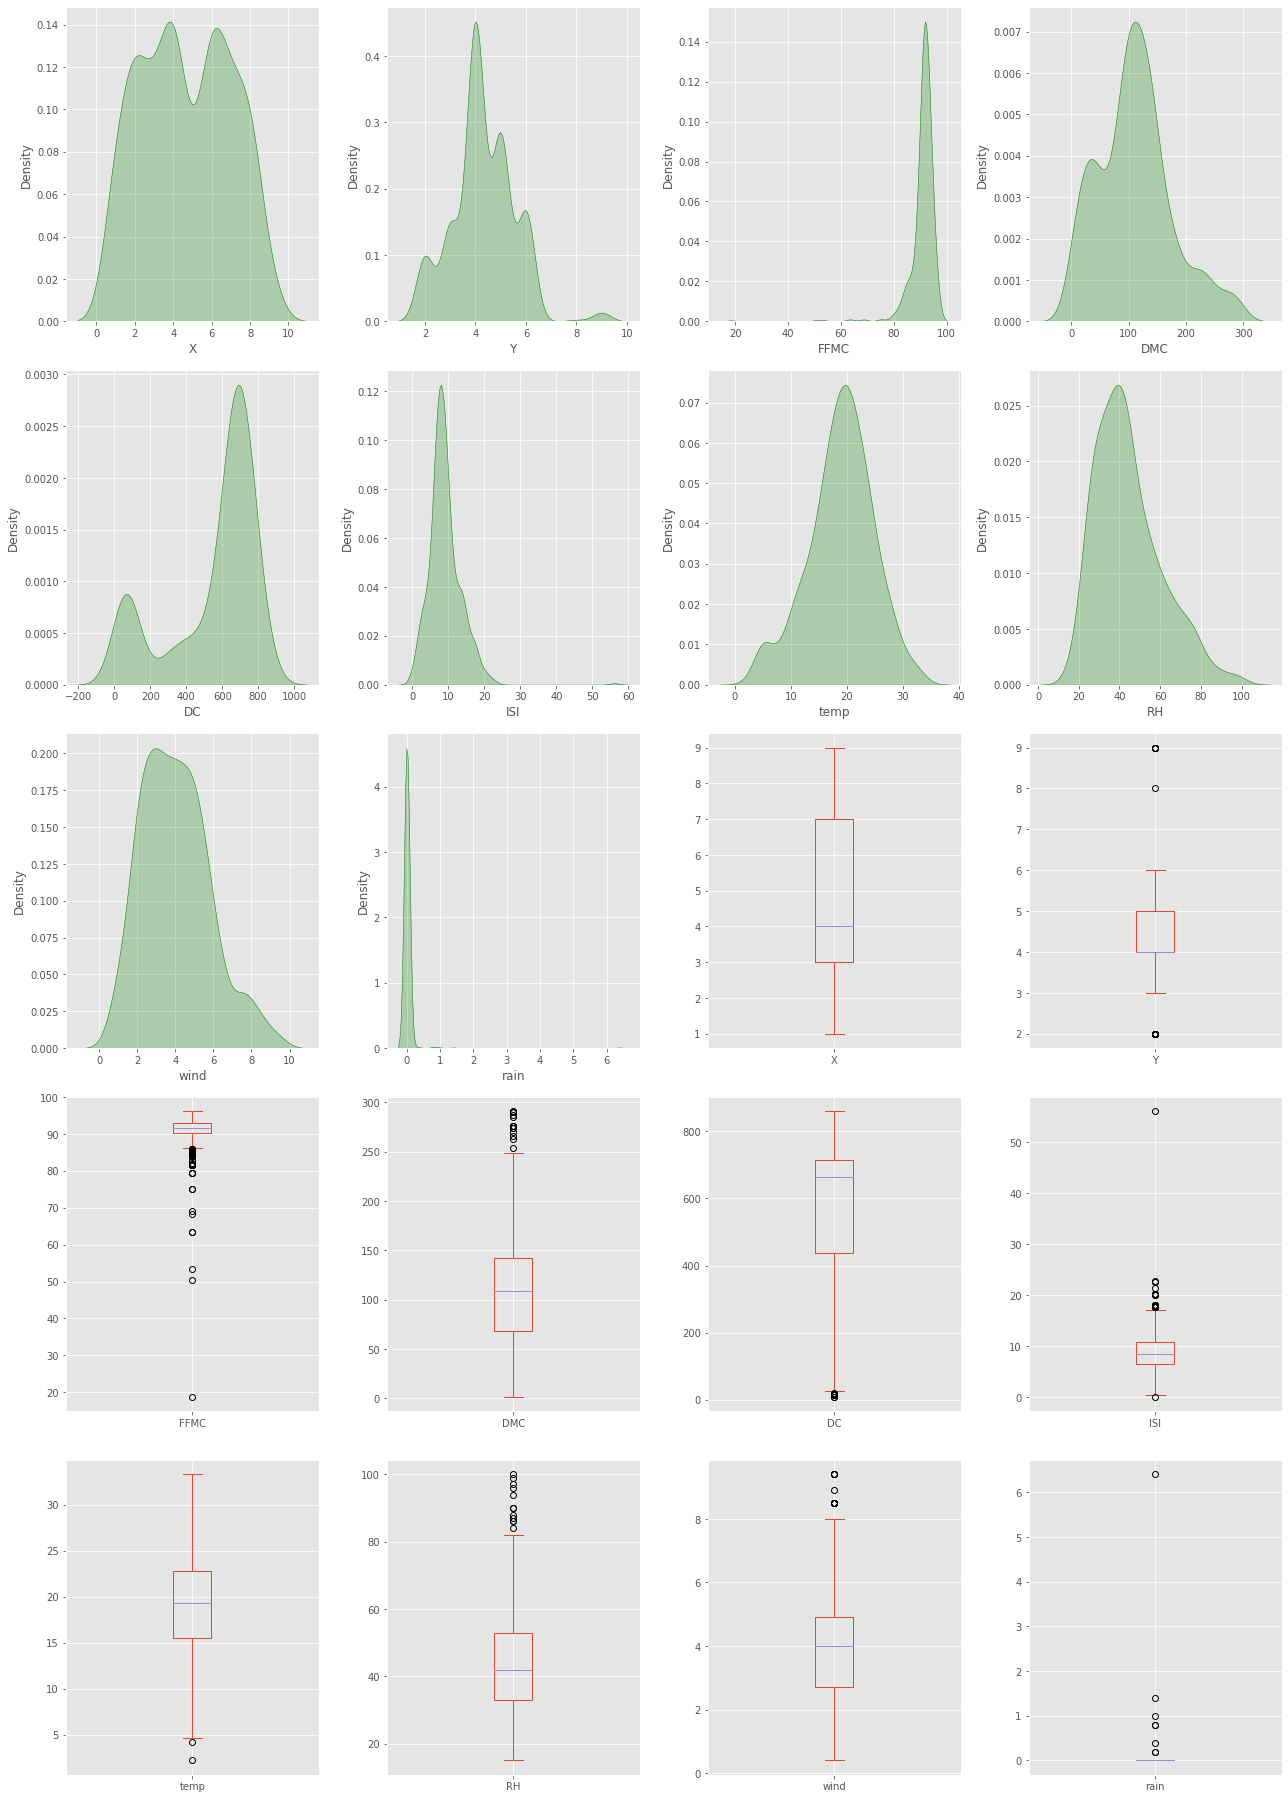

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
skewness,0.036246,0.417296,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344
kurtosis,-1.172331,1.420553,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964


In [14]:
plt.figure(figsize=(18, 40))

for i,col in enumerate(num_columns, 1):
    plt.subplot(8, 4 , i)
    sns.kdeplot(df[col], color='g', shade = True)
    plt.subplot(8, 4, i+10)
    df[col].plot.box()
    
plt.tight_layout()
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(), num_data.kurtosis()], index=['skewness', 'kurtosis'])

Outliers, Skewness and kurtosis (high positive or negative) was observed in the following columns:
1. FFMC
2. ISI
3. rain

In [15]:
print(df['area'].describe(), '\n')
print(y_outliers)

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64 

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain     area
237  1  2   sep  tue  91.0  129.5  692.6   7.0  18.8  40   2.2   0.0   212.88
238  6  5   sep  sat  92.5  121.1  674.4   8.6  25.1  27   4.0   0.0  1090.84
415  8  6   aug  thu  94.8  222.4  698.6  13.9  27.5  27   4.9   0.0   746.28
479  7  4   jul  mon  89.2  103.9  431.6   6.4  22.6  57   4.9   0.0   278.53


In [16]:
# No damage, low, moderate, high, very high
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df['damage_category'] = df['area'].apply(area_cat)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage_category
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,No damage
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,No damage
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,No damage
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,No damage
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,No damage


## Categorical columns

In [17]:
cat_columns

['month', 'day']

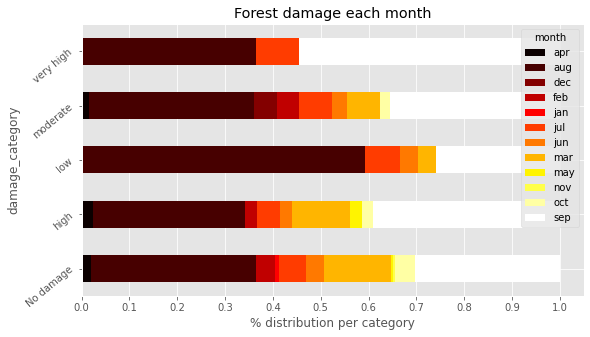

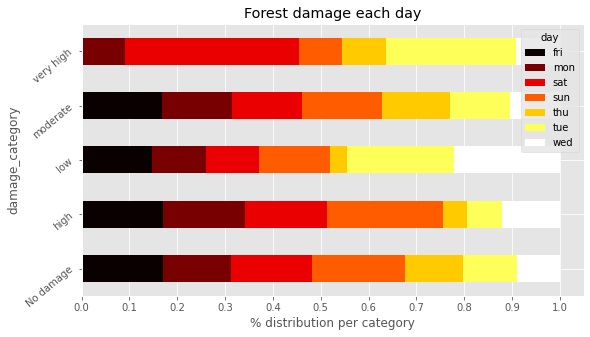

In [18]:
for col in cat_columns:
    cross = pd.crosstab(index= df['damage_category'], columns = df[col], normalize='index')
    cross.plot.barh(stacked = True, rot = 40, cmap = 'hot')
    plt.xlabel('% distribution per category')
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.title("Forest damage each {}".format(col))
    
plt.show()

## Numerical columns

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWa

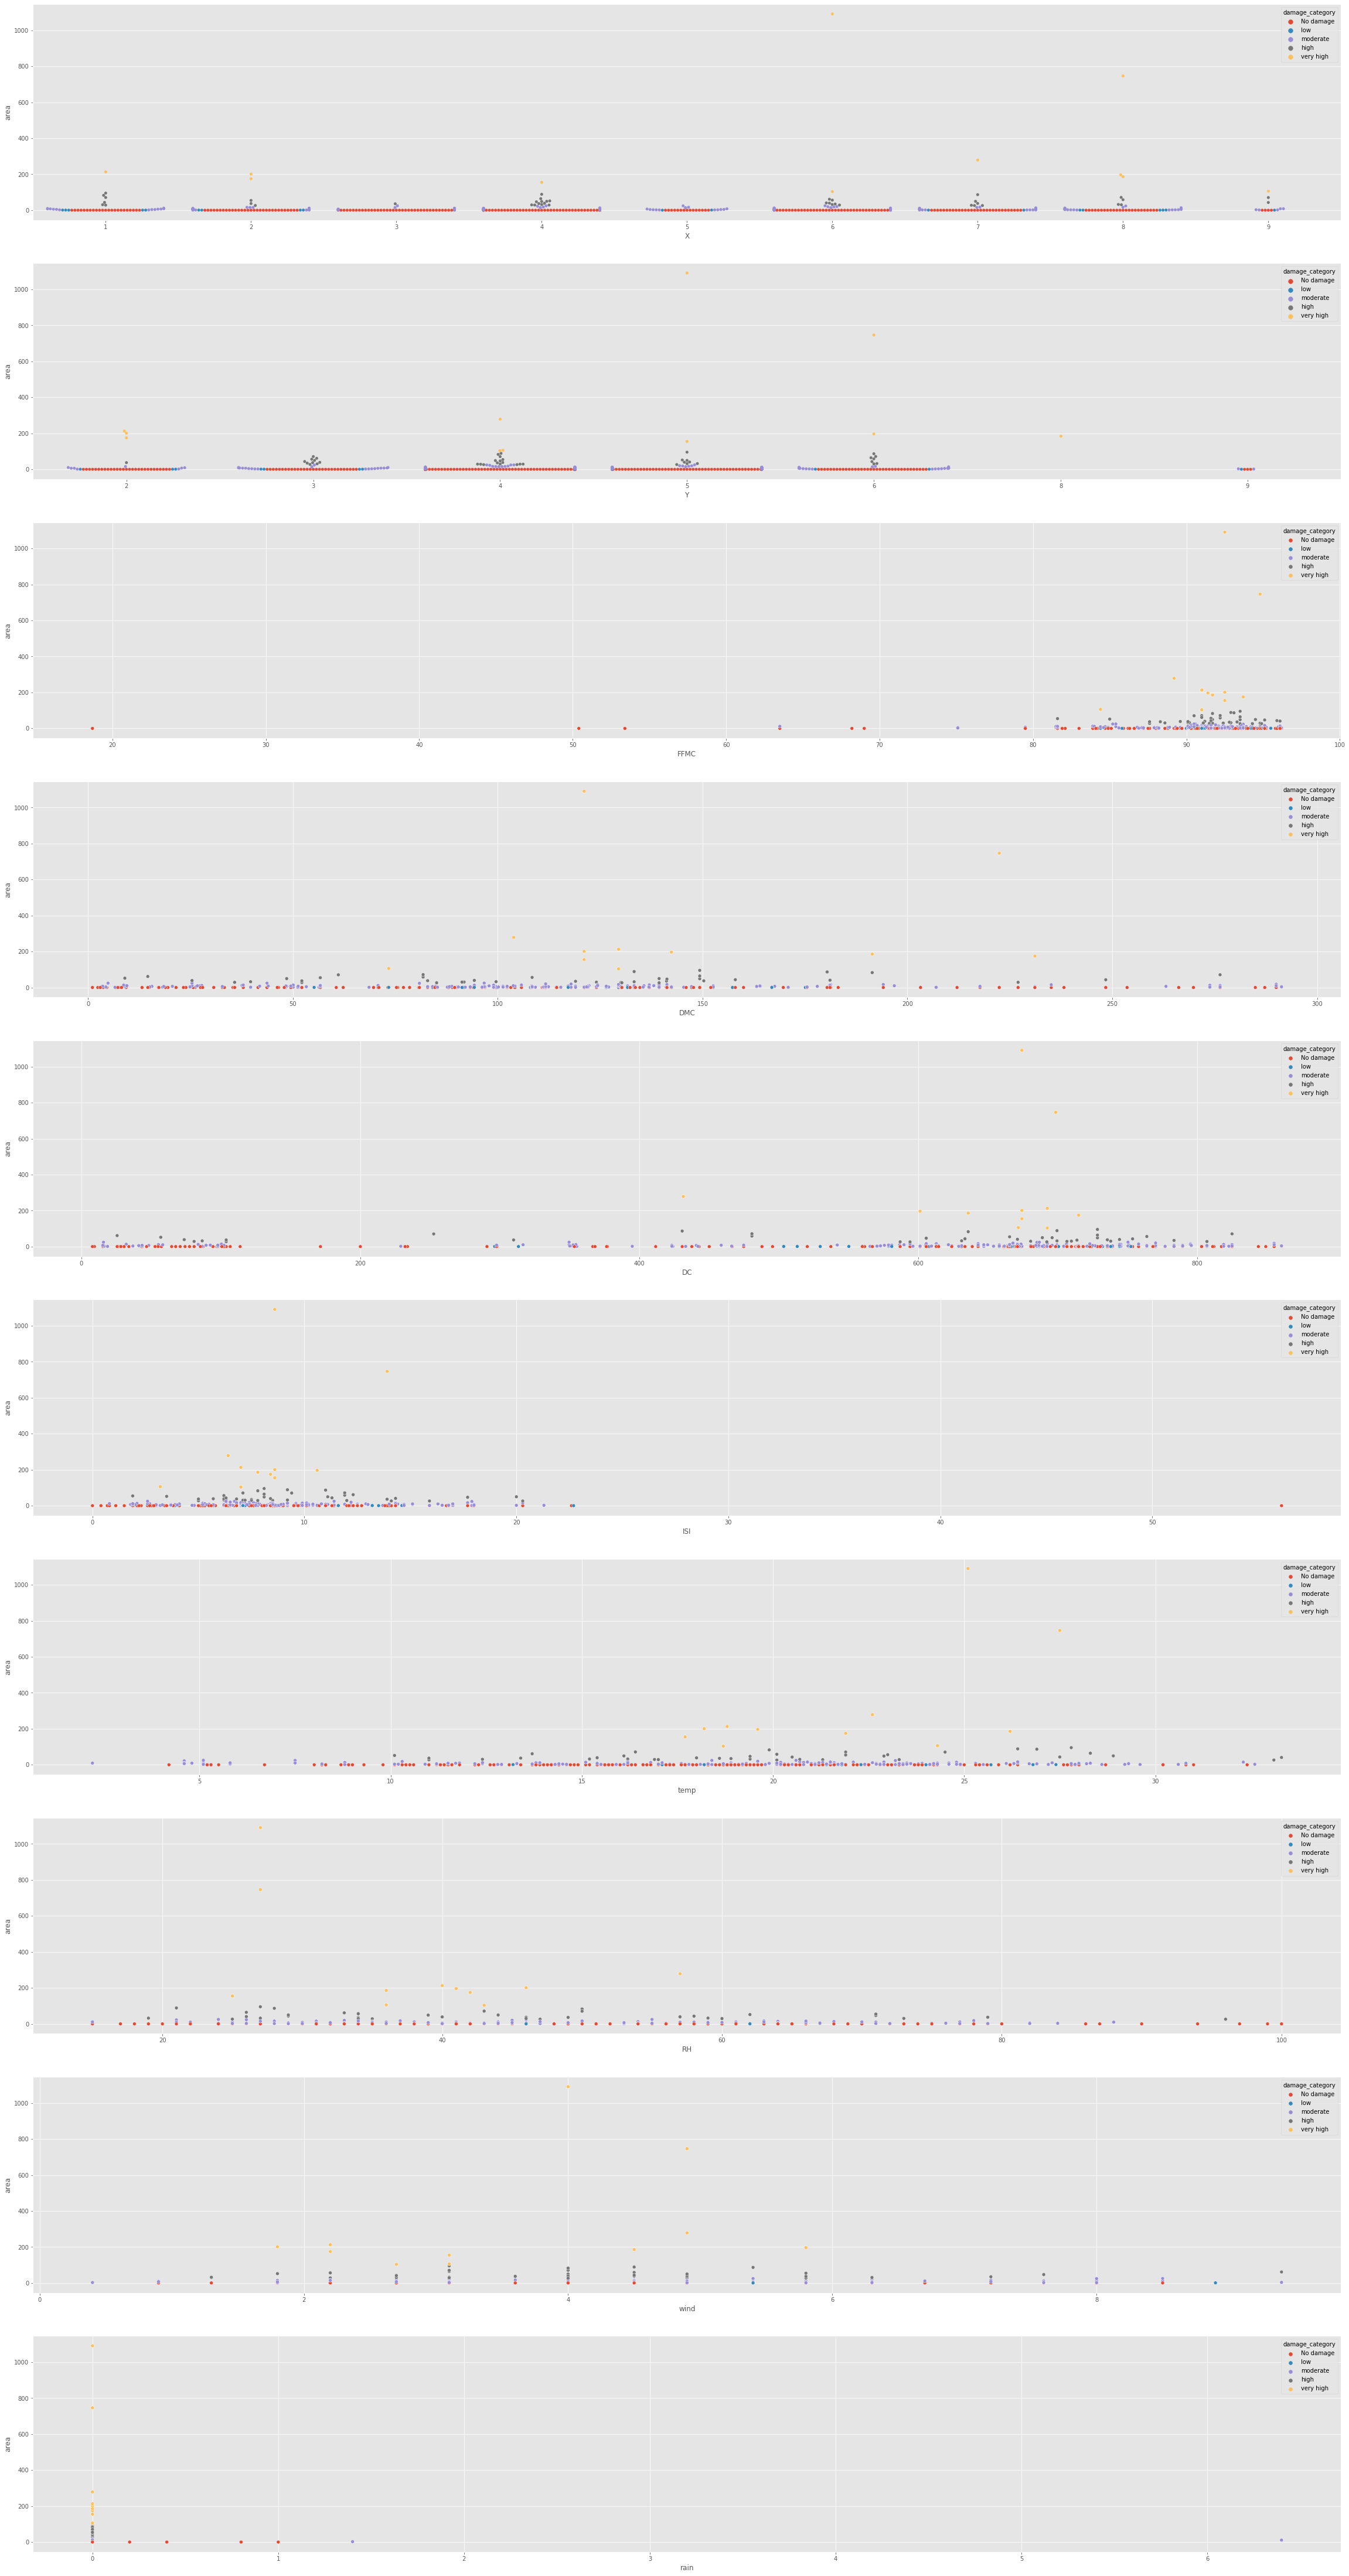

In [19]:
plt.figure(figsize=(40, 80))
for i,col in enumerate(num_columns, 1):
    plt.subplot(10, 1, i)
    if col in ['X', 'Y']:
        sns.swarmplot(data = df, x = col, y = target, hue = 'damage_category')
    else:
        sns.scatterplot(data = df, x = col, y = target, hue = 'damage_category')
plt.show()

In [20]:
#Multivariate analysis
selected_features = df.drop(columns=['damage_category','day','month']).columns
selected_features

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area'],
      dtype='object')

sns.pairplot(df, hue = 'damage_category', vars = selected_features)
plt.show()

## Outliers Treatment

We had observed outliers in the following columns:
1. area 
2. FFMC
3. ISI
4. rain

In [21]:
out_columns = ['area', 'FFMC', 'ISI', 'rain']

However, the above outliers are not error values so we cannot remove it.

In order to minimize the effect of outliers in our model we will transform the above features.

In [22]:
df['split'] = pd.cut(include_lowest = True, x = df['area'], bins = [0,0.1, 2, 5, 10, 50, 1091])

In [23]:
df.split.value_counts()

(-0.001, 0.1]     248
(10.0, 50.0]       71
(0.1, 2.0]         62
(2.0, 5.0]         56
(5.0, 10.0]        56
(50.0, 1091.0]     24
Name: split, dtype: int64

In [24]:
df.dtypes

X                     int64
Y                     int64
month                object
day                  object
FFMC                float64
DMC                 float64
DC                  float64
ISI                 float64
temp                float64
RH                    int64
wind                float64
rain                float64
area                float64
damage_category      object
split              category
dtype: object

In [25]:
features = list(df.drop(columns=['split',  'damage_category']).columns)

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1,
                            test_size=0.3,
                            random_state=42)
train_idx, test_idx = next(sss.split(df[features], df.split))

Xy_train = df.loc[train_idx, features]

Xy_test = df.loc[test_idx, features]

len(Xy_train), len(Xy_test)

(361, 156)

In [27]:
Xy_train.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
149,8,6,sep,thu,93.7,80.9,685.2,17.9,23.7,25,4.5,0.0,1.12
405,2,2,aug,tue,94.6,212.1,680.9,9.5,27.9,27,2.2,0.0,0.00
207,7,5,sep,tue,91.0,129.5,692.6,7.0,20.7,37,2.2,0.0,17.20
127,3,5,sep,fri,93.5,149.3,728.6,8.1,17.2,43,3.1,0.0,0.00
267,2,2,aug,tue,92.1,152.6,658.2,14.3,23.7,24,3.1,0.0,0.00


In [28]:
## Saving after data wrangling, EDA, and preprocessing

outputfile_1 = 'forest_fires_deploy_train.csv'
outputfile_2 = 'forest_fires_deploy_test.csv'
Xy_train.to_csv(outputfile_1, index=False)
Xy_test.to_csv(outputfile_2, index = False)

In [29]:
Xy_train.describe().T

,count,mean,std,min,25%,50%,75%,max
X,361.0,4.728532,2.322233,1.0,3.0,4.00,7.00,9.00
Y,361.0,4.307479,1.250411,2.0,4.0,4.00,5.00,9.00
FFMC,361.0,90.579224,6.023176,18.7,90.2,91.60,92.90,96.20
DMC,361.0,111.152355,62.120927,1.1,73.2,108.40,141.30,291.30
DC,361.0,551.352632,244.865226,7.9,442.1,661.80,709.90,860.60
ISI,361.0,9.113019,4.757260,0.0,6.5,8.40,11.10,56.10
temp,361.0,18.983934,5.952993,4.2,15.8,19.40,23.00,33.30
RH,361.0,45.072022,17.268318,15.0,33.0,42.00,54.00,100.00
wind,361.0,4.054017,1.771641,0.9,2.7,4.00,4.90,9.40
rain,361.0,0.028809,0.351585,0.0,0.0,0.00,0.00,6.40


In [30]:
print(Xy_train['day'].value_counts())

sun    65
sat    64
fri    61
mon    51
tue    47
thu    43
wed    30
Name: day, dtype: int64


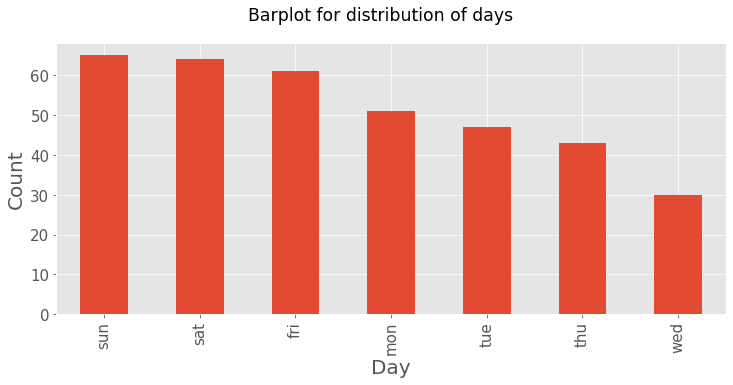

In [31]:
plt.figure(figsize=(12, 5))
ax = Xy_train['day'].value_counts().plot(kind = 'bar')
ax.set_xlabel("Day", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
ax.tick_params(labelsize = 15)
plt.suptitle("Barplot for distribution of days", fontsize = "xx-large")
plt.show()

Here we can see that in sundays, saturday and fridays the forest fires happens frequently(It can be because these are the weekdays and people go for camping or trekking etc in the forest)

In [32]:
print(Xy_train['month'].value_counts())

aug    130
sep    123
mar     35
jul     21
jun     14
feb     13
oct      8
apr      8
dec      5
may      2
jan      2
Name: month, dtype: int64


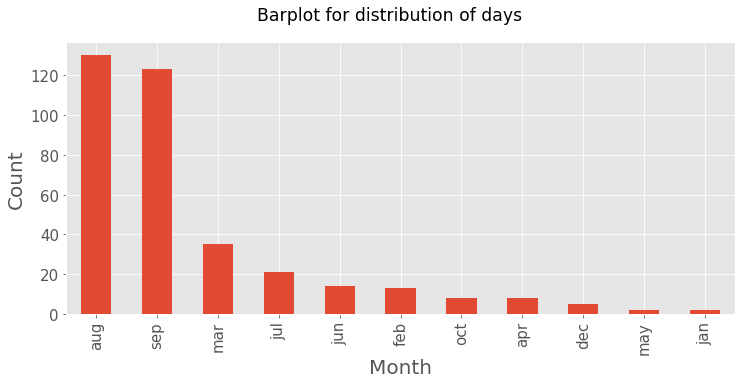

In [33]:
plt.figure(figsize=(12, 5))
ax = Xy_train['month'].value_counts().plot(kind = 'bar')
ax.set_xlabel("Month", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
ax.tick_params(labelsize = 15)
plt.suptitle("Barplot for distribution of days", fontsize = "xx-large")
plt.show()

Here we can see that August and September consists of the maximum amount of forest fires in our dataset.

In [34]:
print(Xy_train['rain'].unique())
Xy_train['rain'].value_counts(normalize=True)

[0.  0.2 0.8 1.  1.4 6.4 0.4]


0.0    0.980609
0.2    0.005540
0.8    0.002770
1.0    0.002770
1.4    0.002770
6.4    0.002770
0.4    0.002770
Name: rain, dtype: float64

In [35]:
Xy_train.query('rain > 0')

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
286,7,6,jul,wed,91.2,183.1,437.7,12.5,12.6,90,7.6,0.2,0.00
500,8,6,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00
243,7,4,aug,sun,91.8,175.1,700.7,13.8,21.9,73,7.6,1.0,0.00
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17
499,7,5,aug,tue,96.1,181.1,671.2,14.3,27.3,63,4.9,6.4,10.82
502,4,4,aug,tue,96.1,181.1,671.2,14.3,20.7,69,4.9,0.4,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00


As we can see that almost(98 %) data for the rain are 0 and it doesn't show much variation. We can either bin it into 2 seperate categories(0 or greater than zero) or discard the 'rain' column. we will drop it b'coz it doesn't contain much information.

In [36]:
Xy_train = Xy_train.drop(columns='rain')
features.remove('rain')

In [37]:
Xy_train.skew()

<ipython-input-37-b735e4a44e84>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Xy_train.skew()


X        0.012558
Y        0.464758
FFMC    -6.783776
DMC      0.532364
DC      -1.128983
ISI      3.038420
temp    -0.324559
RH       0.813030
wind     0.663742
area    11.253688
dtype: float64

In [38]:
skew_limit = 0.75
skew_vals = Xy_train.select_dtypes(exclude="object").skew()
skew_cols = skew_vals[abs(skew_vals) > skew_limit].sort_values(ascending= False)
skew_cols_bf = skew_cols.index.values
print(f"Columns skewed more than 0.75:  {skew_cols_bf}")
df[skew_cols_bf].agg(['skew']).transpose()

Columns skewed more than 0.75:  ['area' 'ISI' 'RH' 'DC' 'FFMC']


,skew
area,12.846934
ISI,2.536325
RH,0.862904
DC,-1.100445
FFMC,-6.575606


In [39]:
Xy_train.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,area
149,8,6,sep,thu,93.7,80.9,685.2,17.9,23.7,25,4.5,1.12
405,2,2,aug,tue,94.6,212.1,680.9,9.5,27.9,27,2.2,0.00
207,7,5,sep,tue,91.0,129.5,692.6,7.0,20.7,37,2.2,17.20
127,3,5,sep,fri,93.5,149.3,728.6,8.1,17.2,43,3.1,0.00
267,2,2,aug,tue,92.1,152.6,658.2,14.3,23.7,24,3.1,0.00


Xy_train = Xy_train.drop(columns=['month', 'day'])

print(Xy_train[skew_cols_bf].describe())
np.log1p(Xy_train[skew_cols_bf]).skew(), np.log1p(Xy_train[skew_cols_bf]).kurtosis()

In [40]:
def log_tranform(data, skew_cols_bf):
    
    transformed_df = Xy_train.copy()
    pos_skew = df[skew_cols_bf].agg(['skew']).transpose().query('skew > 0').index
    neg_skew = df[skew_cols_bf].agg(['skew']).transpose().query('skew < 0').index
    
    for cols in pos_skew:
        transformed_df[cols] = np.log1p(transformed_df[cols])
        
    for cols in neg_skew:
        transformed_df[cols] = np.log1p(max(transformed_df[cols] + 1) - transformed_df[cols])
        
    return transformed_df

transf_df = log_tranform(Xy_train, skew_cols_bf)
transf_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,area
149,8,6,sep,thu,1.504077,80.9,5.178407,2.939162,23.7,3.258097,4.5,0.751416
405,2,2,aug,tue,1.280934,212.1,5.202357,2.351375,27.9,3.332205,2.2,0.000000
207,7,5,sep,tue,1.974081,129.5,5.135798,2.079442,20.7,3.637586,2.2,2.901422
127,3,5,sep,fri,1.547563,149.3,4.897840,2.208274,17.2,3.784190,3.1,0.000000
267,2,2,aug,tue,1.808289,152.6,5.320079,2.727853,23.7,3.218876,3.1,0.000000


In [41]:
skew_limit = 0.75
skew_vals = transf_df.select_dtypes(exclude="object").skew()
skew_cols = skew_vals[abs(skew_vals) > skew_limit].sort_values(ascending= False)
skew_cols_af = skew_cols.index.values
print(f"Columns skewed more than 0.75:  {skew_cols_af}")
transf_df[skew_cols_af].agg(['skew']).transpose()

Columns skewed more than 0.75:  ['area' 'FFMC' 'DC' 'ISI']


,skew
area,1.275869
FFMC,0.775587
DC,-0.924459
ISI,-0.951554


In [42]:
features = list(Xy_train.drop(columns = 'area').columns)

In [43]:
X_train = pd.DataFrame(Xy_train[features])
y_train = pd.DataFrame(Xy_test['area'])
X_test = pd.DataFrame(Xy_train[features])
y_test = pd.DataFrame(Xy_test['area'])

## Feature Scaling(Robust Transformation)

In [44]:
scale_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind']

In [45]:
rs = RobustScaler()

NameError: name 'RobustScaler' is not defined